## 1. 安装和导入依赖

如果没有安装 diffusers，先运行：
```
pip install diffusers transformers accelerate
```

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 检查 GPU
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU: {torch.cuda.get_device_name(0)}")
print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

CUDA available: True
GPU: NVIDIA GeForce RTX 5050 Laptop GPU
GPU Memory: 8.5 GB


## 2. 加载预训练的 Stable Diffusion 模型

In [2]:
from diffusers import StableDiffusionPipeline

# 加载 SD 1.5 模型（约4GB，首次下载需要几分钟）
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,  # 半精度，节省显存
    safety_checker=None,  # 关闭安全检查，加速
    requires_safety_checker=False
)
pipe = pipe.to("cuda")

# 优化设置
pipe.enable_attention_slicing()  # 节省显存

print("模型加载完成！")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


模型加载完成！


## 3. 快速生成测试（单张图像）

  0%|          | 0/20 [00:00<?, ?it/s]

生成时间: 6.04 秒


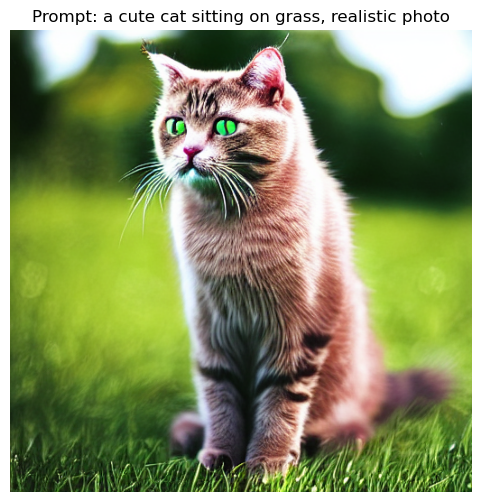

In [3]:
import time

# 生成单张图像
prompt = "a cute cat sitting on grass, realistic photo"

start_time = time.time()
image = pipe(
    prompt,
    num_inference_steps=20,  # 20步足够7-8成效果
    guidance_scale=7.5,
    height=512,
    width=512
).images[0]
elapsed = time.time() - start_time

print(f"生成时间: {elapsed:.2f} 秒")

# 显示图像
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f"Prompt: {prompt}")
plt.axis('off')
plt.show()

## 4. 生成 CIFAR-10 类别的图像

CIFAR-10 包含 10 个类别：airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

In [4]:
# CIFAR-10 类别
cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# 为每个类别生成一张图像
generated_images = []

for cls in cifar10_classes:
    prompt = f"a photo of a {cls}, high quality, realistic"
    print(f"生成: {cls}...", end=" ")
    
    start_time = time.time()
    image = pipe(
        prompt,
        num_inference_steps=20,
        guidance_scale=7.5,
        height=512,
        width=512
    ).images[0]
    elapsed = time.time() - start_time
    
    generated_images.append(image)
    print(f"完成 ({elapsed:.2f}s)")

print("\n所有类别生成完成！")

生成: airplane... 

  0%|          | 0/20 [00:00<?, ?it/s]

完成 (5.22s)
生成: automobile... 

  0%|          | 0/20 [00:00<?, ?it/s]

完成 (4.97s)
生成: bird... 

  0%|          | 0/20 [00:00<?, ?it/s]

完成 (4.95s)
生成: cat... 

  0%|          | 0/20 [00:00<?, ?it/s]

完成 (4.95s)
生成: deer... 

  0%|          | 0/20 [00:00<?, ?it/s]

完成 (4.98s)
生成: dog... 

  0%|          | 0/20 [00:00<?, ?it/s]

完成 (4.99s)
生成: frog... 

  0%|          | 0/20 [00:00<?, ?it/s]

完成 (4.98s)
生成: horse... 

  0%|          | 0/20 [00:00<?, ?it/s]

完成 (5.21s)
生成: ship... 

  0%|          | 0/20 [00:00<?, ?it/s]

完成 (5.06s)
生成: truck... 

  0%|          | 0/20 [00:00<?, ?it/s]

完成 (5.01s)

所有类别生成完成！


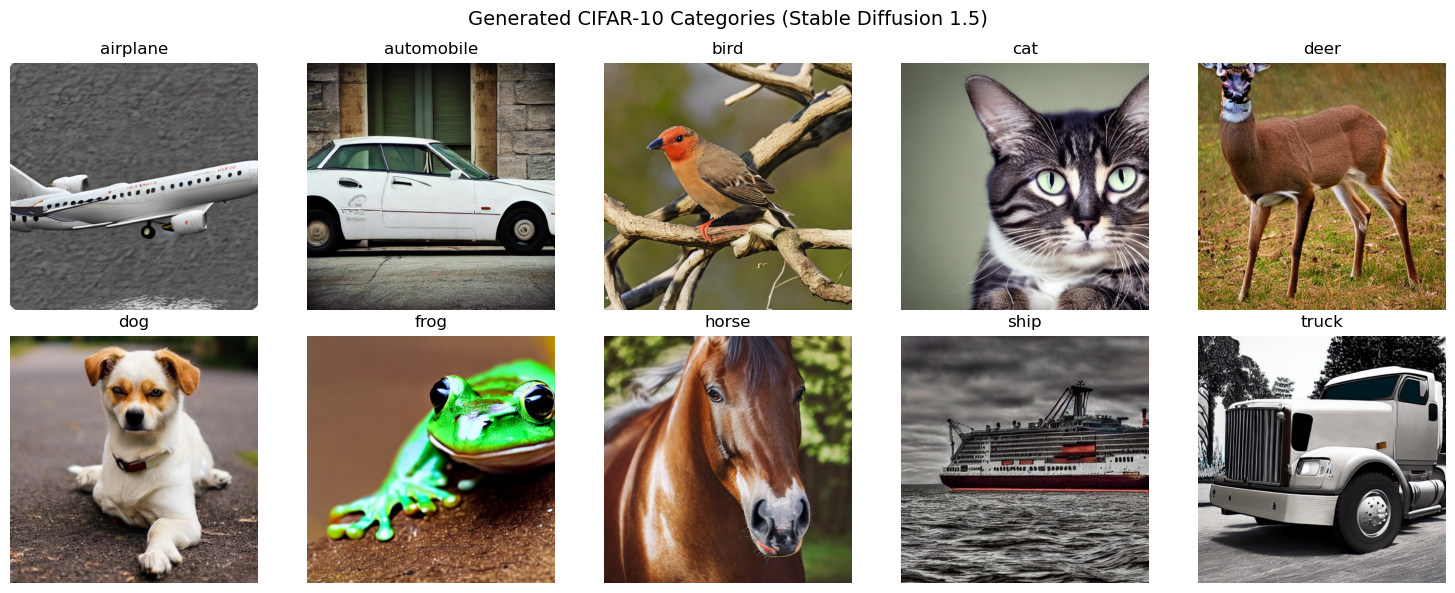

In [5]:
# 可视化所有生成的图像
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for idx, (img, cls) in enumerate(zip(generated_images, cifar10_classes)):
    axes[idx].imshow(img)
    axes[idx].set_title(cls)
    axes[idx].axis('off')

plt.suptitle("Generated CIFAR-10 Categories (Stable Diffusion 1.5)", fontsize=14)
plt.tight_layout()
plt.show()

## 5. 批量生成（每个类别多张）

In [6]:
# 批量生成：每个类别生成 n 张
n_per_class = 5  # 每个类别生成5张
batch_images = {cls: [] for cls in cifar10_classes}

total = n_per_class * len(cifar10_classes)
count = 0

start_total = time.time()

for cls in cifar10_classes:
    for i in range(n_per_class):
        prompt = f"a photo of a {cls}, high quality, realistic"
        
        image = pipe(
            prompt,
            num_inference_steps=20,
            guidance_scale=7.5,
            height=512,
            width=512
        ).images[0]
        
        batch_images[cls].append(image)
        count += 1
        print(f"\r进度: {count}/{total}", end="")

elapsed_total = time.time() - start_total
print(f"\n\n总计生成 {total} 张图像")
print(f"总耗时: {elapsed_total:.1f} 秒")
print(f"平均每张: {elapsed_total/total:.2f} 秒")

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 1/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 2/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 3/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 4/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 5/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 6/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 7/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 8/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 9/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 10/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 11/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 12/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 13/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 14/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 15/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 16/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 17/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 18/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 19/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 20/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 21/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 22/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 23/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 24/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 25/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 26/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 27/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 28/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 29/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 30/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 31/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 32/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 33/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 34/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 35/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 36/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 37/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 38/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 39/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 40/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 41/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 42/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 43/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 44/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 45/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 46/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 47/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 48/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 49/50

  0%|          | 0/20 [00:00<?, ?it/s]

进度: 50/50

总计生成 50 张图像
总耗时: 254.4 秒
平均每张: 5.09 秒


## 6. 提取 Latent 表示（用于后续分析）

In [7]:
from diffusers import AutoencoderKL
from torchvision import transforms

# 加载 VAE（可以单独使用，用于提取 latent）
vae = AutoencoderKL.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    subfolder="vae",
    torch_dtype=torch.float16
).to("cuda")

print("VAE 加载完成！")
print(f"Latent 空间维度: 4 x 64 x 64 (对于 512x512 图像)")

VAE 加载完成！
Latent 空间维度: 4 x 64 x 64 (对于 512x512 图像)


In [8]:
# 图像预处理
preprocess = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # 归一化到 [-1, 1]
])

# 将生成的图像编码到 latent 空间
def encode_to_latent(image, vae):
    """将 PIL 图像编码到 latent 空间"""
    img_tensor = preprocess(image).unsqueeze(0).to("cuda", dtype=torch.float16)
    with torch.no_grad():
        latent = vae.encode(img_tensor).latent_dist.sample()
        latent = latent * 0.18215  # 缩放因子
    return latent

# 测试：编码第一张生成的图像
test_latent = encode_to_latent(generated_images[0], vae)
print(f"Latent shape: {test_latent.shape}")
print(f"Latent dtype: {test_latent.dtype}")

Latent shape: torch.Size([1, 4, 64, 64])
Latent dtype: torch.float16


## 7. 加载本地 CIFAR-10 并编码到 Latent 空间

CIFAR-10 图像形状: (10000, 32, 32, 3)
标签数量: 10000


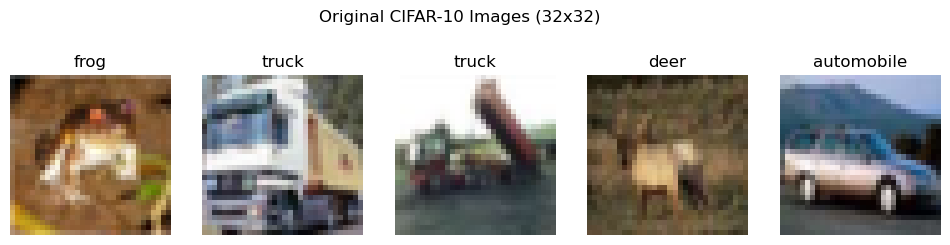

In [9]:
import pickle

# 加载本地 CIFAR-10 数据
def load_cifar10_batch(filepath):
    with open(filepath, 'rb') as f:
        data_dict = pickle.load(f, encoding='bytes')
    images = data_dict[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    labels = data_dict[b'labels']
    return images, labels

# 加载第一个 batch
cifar_path = "data/cifar-10-batches-py/data_batch_1"
images, labels = load_cifar10_batch(cifar_path)

print(f"CIFAR-10 图像形状: {images.shape}")
print(f"标签数量: {len(labels)}")

# 显示几张 CIFAR-10 原图
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    axes[i].imshow(images[i])
    axes[i].set_title(cifar10_classes[labels[i]])
    axes[i].axis('off')
plt.suptitle("Original CIFAR-10 Images (32x32)")
plt.show()

## 8. 清理 GPU 显存

In [15]:
# 清理显存
import gc

del pipe
del vae
gc.collect()
torch.cuda.empty_cache()

print(f"当前显存使用: {torch.cuda.memory_allocated() / 1e9:.2f} GB")
print(f"显存缓存: {torch.cuda.memory_reserved() / 1e9:.2f} GB")

当前显存使用: 0.01 GB
显存缓存: 0.04 GB
